In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
stocks_df = pd.read_excel("/content/muertes y bolsas eeuu.xlsx")
stocks_df

,Date,new_deaths_per_million,S&P_BMV IPC,Dow Jones,S&P 500
0,2020-01-27,0.003,49630.15,32920.00,3852.36
1,2020-01-28,0.006,49342.34,33202.81,3895.75
2,2020-01-29,0.000,50047.70,33965.69,3995.32
3,2020-01-30,0.005,50333.10,34110.69,4019.65
4,2020-01-31,0.005,50466.25,34004.81,3990.56
...,...,...,...,...,...
726,2022-12-12,0.211,44862.76,28256.03,3225.52
727,2022-12-13,0.234,45132.60,28859.44,3283.66
728,2022-12-14,0.308,44717.94,28734.45,3273.40
729,2022-12-15,0.323,44134.39,28722.85,3276.24


In [4]:
# Print out the number of stocks

print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 4


In [5]:
# Print the name of stocks
print('Stocks under consideration are:')

for i in stocks_df.columns[1:]:
  print(i)

Stocks under consideration are:
new_deaths_per_million
S&P_BMV IPC
 Dow Jones
S&P 500


In [6]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    731 non-null    datetime64[ns]
 1   new_deaths_per_million  731 non-null    float64       
 2   S&P_BMV IPC             731 non-null    float64       
 3    Dow Jones              731 non-null    float64       
 4   S&P 500                 731 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 28.7 KB


In [7]:
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

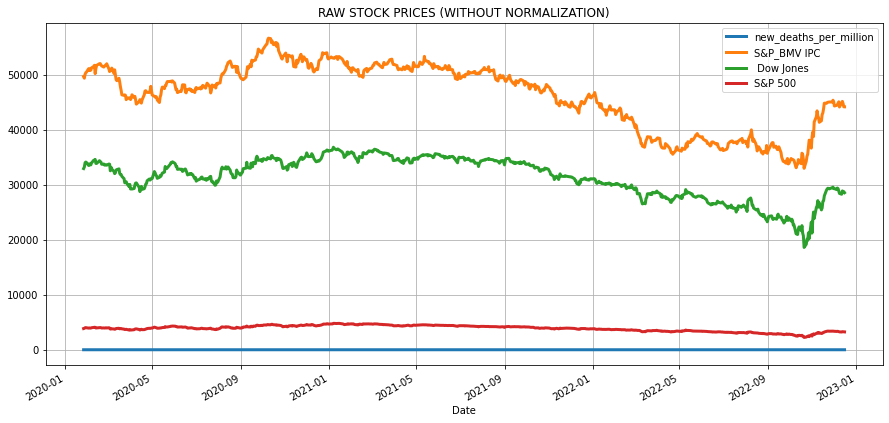

In [8]:
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [9]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [10]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

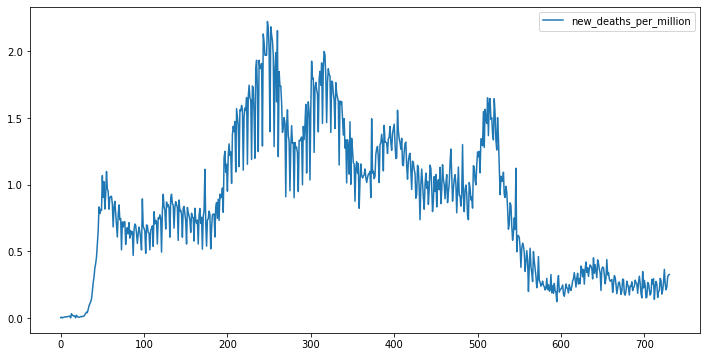

In [11]:

stocks_df[['new_deaths_per_million']].plot(figsize=(12,6));

## Fuente de "Our World in Data"

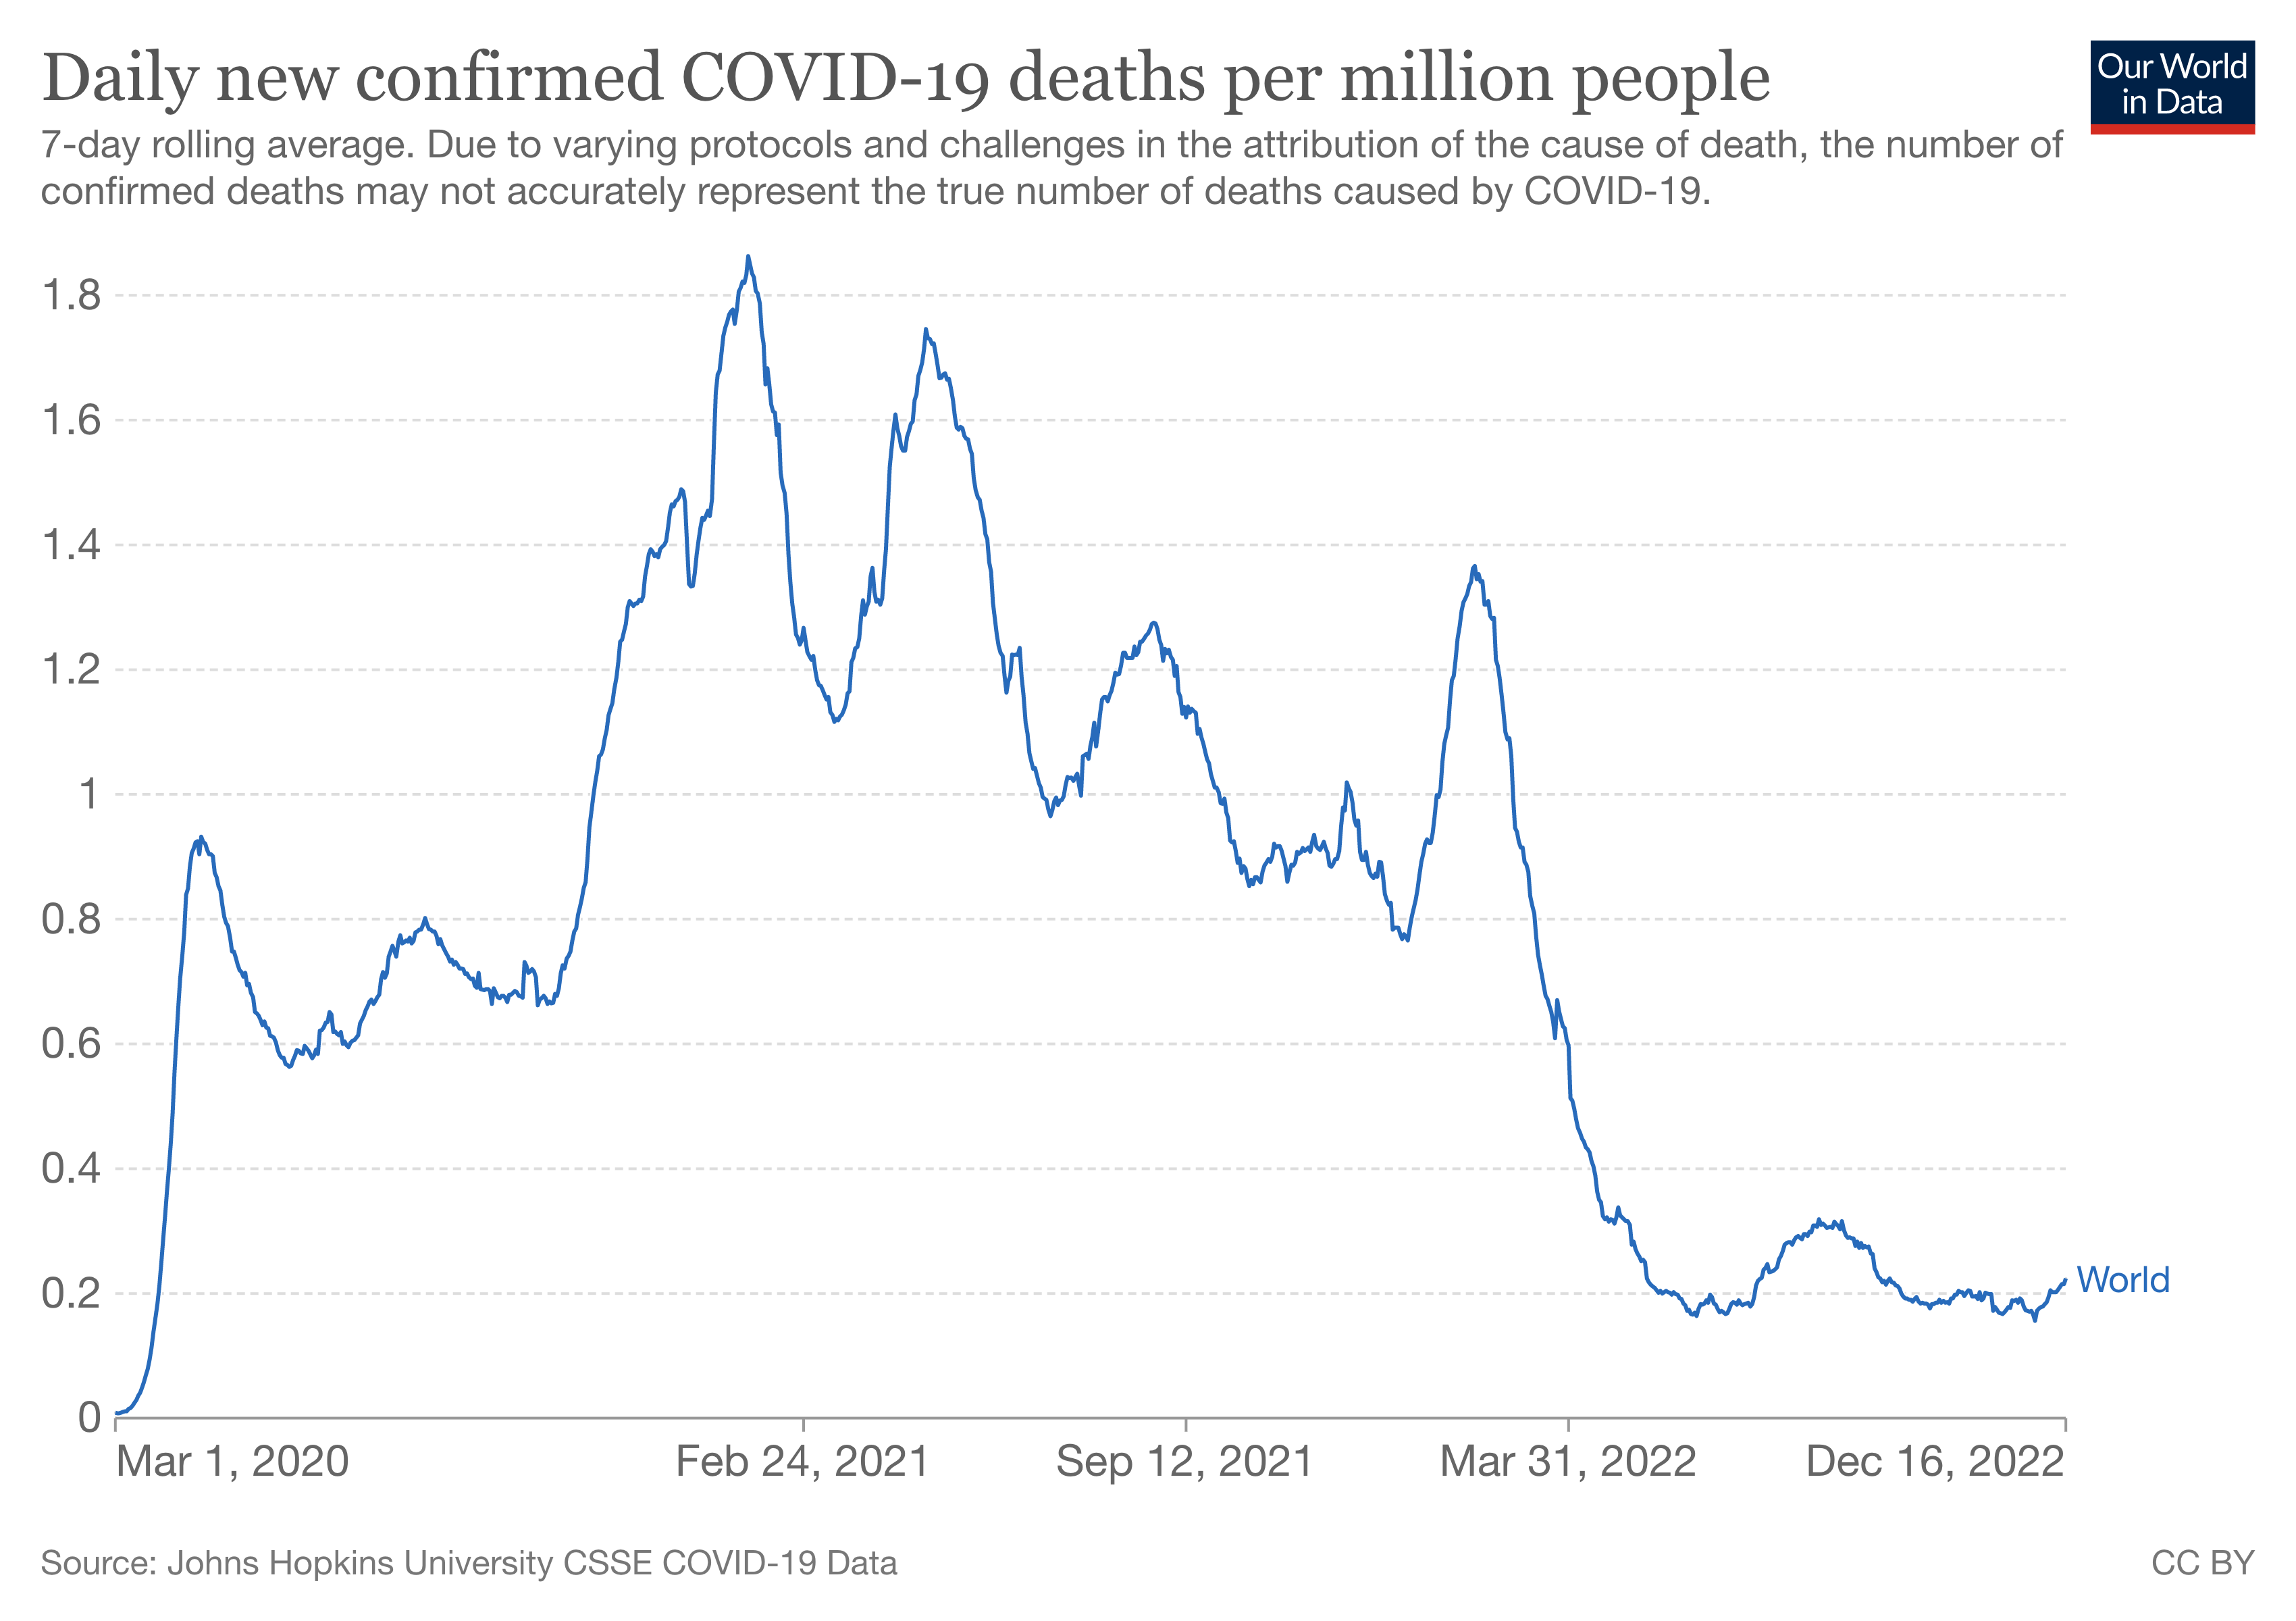

In [14]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [15]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

<ipython-input-14-a30cc0baca62>:12: RuntimeWarning:

divide by zero encountered in double_scalars



In [23]:
stocks_daily_return = pd.read_excel("/content/stocks_daily_return eeuu.xlsx")

In [24]:
stocks_daily_return

,Date,new_deaths_per_million,S&P_BMV IPC,Dow Jones,S&P 500
0,2020-01-27,0.003,0.000000,0.000000,0.000000
1,2020-01-28,0.006,-0.579910,0.859083,1.126323
2,2020-01-29,0.000,1.429523,2.297637,2.555862
3,2020-01-30,0.005,0.570256,0.426901,0.608962
4,2020-01-31,0.005,0.264538,-0.310401,-0.723695
...,...,...,...,...,...
726,2022-12-12,0.211,1.710449,-0.506271,-0.720239
727,2022-12-13,0.234,0.601479,2.135509,1.802500
728,2022-12-14,0.308,-0.918759,-0.433099,-0.312456
729,2022-12-15,0.323,-1.304957,-0.040370,0.086760


In [25]:
#Describe of the returns
stocks_daily_return.describe()

,new_deaths_per_million,S&P_BMV IPC,Dow Jones,S&P 500
count,731.000000,731.000000,731.000000,731.000000
mean,0.854981,-0.008725,-0.006465,-0.010191
std,0.523537,1.213447,1.628275,1.642012
min,0.000000,-4.633175,-10.205212,-8.577920
25%,0.349000,-0.718038,-0.681165,-0.820807
50%,0.835000,-0.005048,-0.048485,-0.088044
75%,1.242500,0.649709,0.559997,0.684397
max,2.224000,6.863366,14.845566,13.615771


In [26]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()


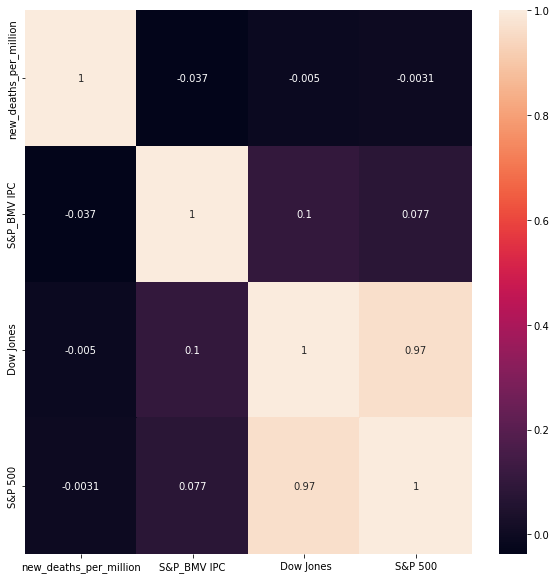

In [27]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

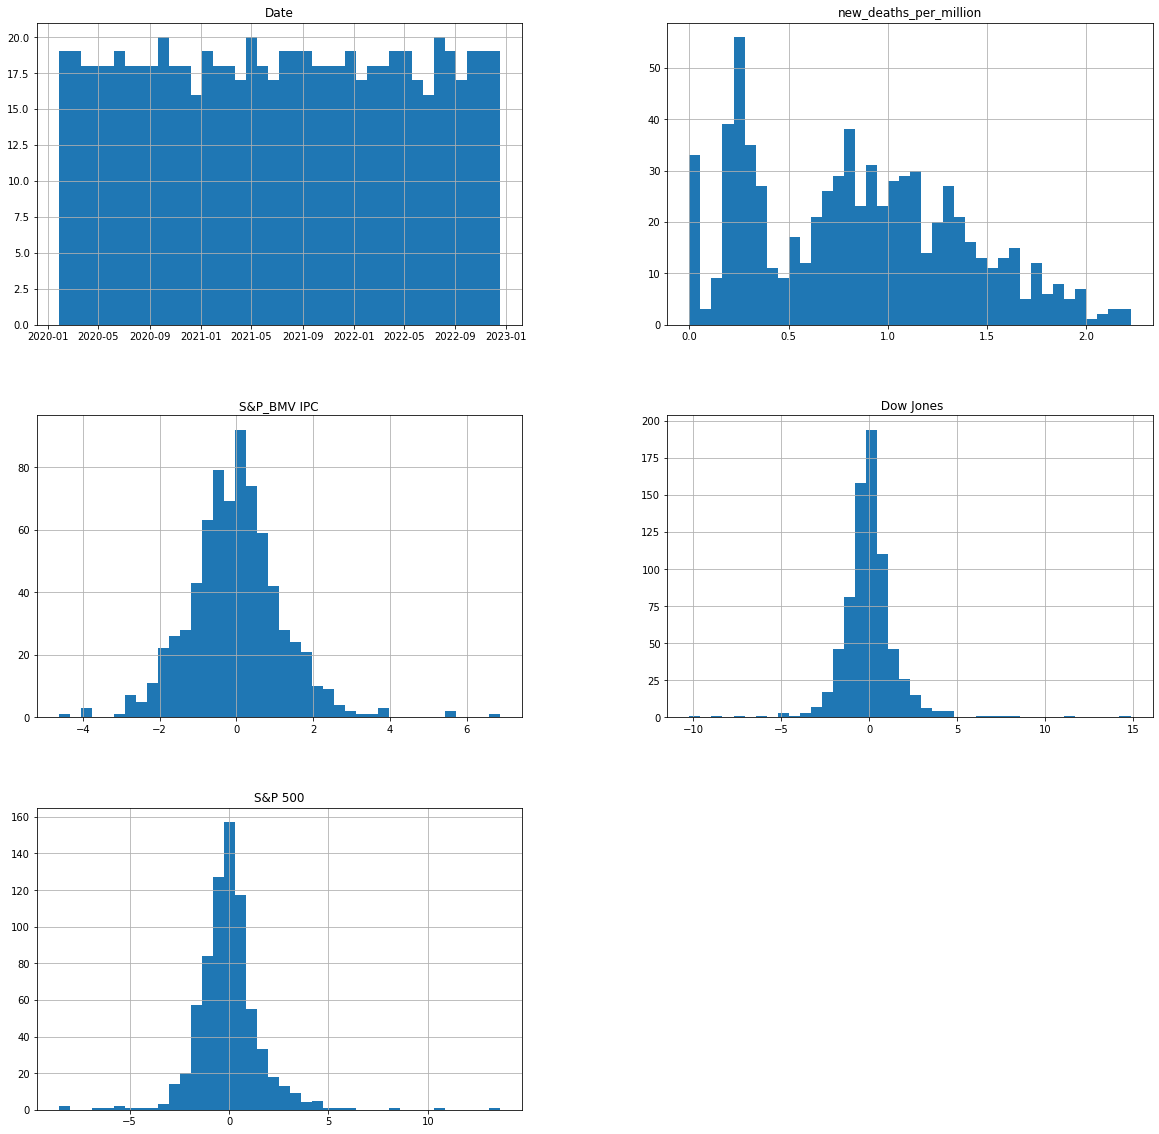

In [28]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
stocks_daily_return.hist(figsize=(20, 20), bins = 40);

In [29]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()

# Drop the date
df_hist = df_hist.drop(columns = ['Date'])

data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([3.000e-03, 6.000e-03, 0.000e+00, 5.000e-03, 5.000e-03, 8.000e-03,
        8.000e-03, 9.000e-03, 9.000e-03, 1.100e-02, 1.300e-02, 1.300e-02,
        1.000e-03, 3.200e-02, 1.900e-02, 1.800e-02, 1.400e-02, 1.600e-02,
        1.000e-03, 2.000e-02, 1.000e-02, 8.000e-03, 5.000e-03, 7.000e-03,
        1.100e-02, 9.000e-03, 1.200e-02, 1.200e-02, 1.400e-02, 2.400e-02,
        3.400e-02, 4.400e-02, 4.000e-02, 6.300e-02, 9.000e-02, 1.070e-01,
        1.200e-01, 1.430e-01, 1.970e-01, 2.630e-01, 3.040e-01, 3.730e-01,
        4.080e-01, 4.560e-01, 5.480e-01, 6.480e-01, 8.330e-01, 7.830e-01,
        8.150e-01, 8.060e-01, 1.068e+00, 9.050e-01, 1.022e+00, 8.170e-01,
        9.230e-01, 1.099e+00, 9.670e-01, 9.520e-01, 8.160e-01, 9.020e-01,
        9.120e-01, 9.120e-01, 8.570e-01, 6.830e-01, 8.310e-01, 8.750e-01,
        7.840e-01, 7.010e-01, 6.070e-01, 7.710e-01, 8.480e-01, 7.360e-01,
        7.460e-01, 5.110e-01, 7.200e-01, 6.820e-01, 7.210e-01, 7.220e-01,
        5.510e-01, 6.500e-01, 6.780e-0

In [30]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()

In [31]:
# Get the mean values
stocks_df.mean()

<ipython-input-31-f05962e54e72>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



new_deaths_per_million        0.854981
S&P_BMV IPC               46233.094925
 Dow Jones                31301.641532
S&P 500                    3875.136990
dtype: float64

In [32]:
# Get the standard deviation of stocks (Volatility)
stocks_df.std()

Date                      305 days 17:43:28.127753828
new_deaths_per_million                       0.523537
S&P_BMV IPC                               5947.824733
 Dow Jones                                3767.516383
S&P 500                                    553.792446
dtype: object

In [33]:
# Statistical data of the dataframe
stocks_df.describe()

,new_deaths_per_million,S&P_BMV IPC,Dow Jones,S&P 500
count,731.000000,731.000000,731.000000,731.000000
mean,0.854981,46233.094925,31301.641532,3875.136990
std,0.523537,5947.824733,3767.516383,553.792446
min,0.000000,32964.220000,18591.930000,2237.400000
25%,0.349000,42183.915000,28726.485000,3450.160000
50%,0.835000,47741.500000,32160.740000,3935.180000
75%,1.242500,51114.005000,34395.255000,4344.630000
max,2.224000,56609.540000,36799.650000,4796.560000


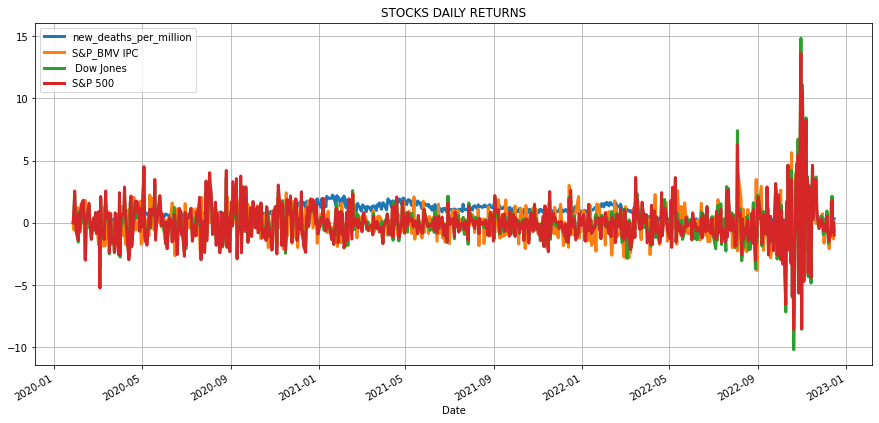

In [34]:
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [35]:
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex
from statsmodels.tsa.stattools import adfuller


Pruebas de cointegracion de orden 0 con datos de retorno

In [37]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['S&P_BMV IPC'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-3.4915599307776235, 0.00820651715363967, 14, 716, {'1%': -3.439516060164992, '5%': -2.8655850998755263, '10%': -2.5689240826597173}, 2347.008562750525)


In [61]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return[' Dow Jones'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-5.553097275405433, 1.603264254441202e-06, 8, 722, {'1%': -3.439439614524914, '5%': -2.865551414233055, '10%': -2.5689061365397747}, 2652.4280451659806)


In [41]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['S&P 500'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-5.456763041525135, 2.5713683431739646e-06, 8, 722, {'1%': -3.439439614524914, '5%': -2.865551414233055, '10%': -2.5689061365397747}, 2673.0785137387948)


## Pruebas de cointegracion de orden 1 con los datos a nivel

In [42]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['S&P_BMV IPC'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.2364882232528203, 0.657705825537227, 0, 730, {'1%': -3.4393396487377155, '5%': -2.865507363200066, '10%': -2.5688826684180897}, 10914.124004776218)


In [62]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df[' Dow Jones'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.560638587487073, 0.5033299005516914, 9, 721, {'1%': -3.4394522667904153, '5%': -2.8655569894909805, '10%': -2.568909106765338}, 10568.797852343001)


In [47]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['S&P 500'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.048532498940585, 0.7351544460851441, 9, 721, {'1%': -3.4394522667904153, '5%': -2.8655569894909805, '10%': -2.568909106765338}, 7663.227570873831)


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [50]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 13.6 MB/s eta 0:00:00


In [51]:
from arch import arch_model


In [52]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(stocks_df["new_deaths_per_million"])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.284
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Prueba de causalidad

In [53]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'S&P_BMV IPC']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2411  , p=0.8676  , df_denom=721, df_num=3
ssr based chi2 test:   chi2=0.7305  , p=0.8660  , df=3
likelihood ratio test: chi2=0.7301  , p=0.8661  , df=3
parameter F test:         F=0.2411  , p=0.8676  , df_denom=721, df_num=3


{3: ({'ssr_ftest': (0.2411439562584591, 0.8676464735813314, 721.0, 3),
   'ssr_chi2test': (0.7304554791518372, 0.8660181973799719, 3),
   'lrtest': (0.7300892644780106, 0.8661048559683191, 3),
   'params_ftest': (0.24114395625851395, 0.8676464735813123, 721.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [54]:
grangercausalitytests(stocks_daily_return[['S&P_BMV IPC', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5359  , p=0.6578  , df_denom=721, df_num=3
ssr based chi2 test:   chi2=1.6233  , p=0.6541  , df=3
likelihood ratio test: chi2=1.6215  , p=0.6545  , df=3
parameter F test:         F=0.5359  , p=0.6578  , df_denom=721, df_num=3


{3: ({'ssr_ftest': (0.5358853284330963, 0.6578083949609768, 721.0, 3),
   'ssr_chi2test': (1.623264295836175, 0.6541263766227432, 3),
   'lrtest': (1.6214572377389231, 0.6545343809089721, 3),
   'params_ftest': (0.5358853284329851, 0.6578083949610491, 721.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [63]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', ' Dow Jones']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6211  , p=0.6015  , df_denom=721, df_num=3
ssr based chi2 test:   chi2=1.8815  , p=0.5974  , df=3
likelihood ratio test: chi2=1.8791  , p=0.5979  , df=3
parameter F test:         F=0.6211  , p=0.6015  , df_denom=721, df_num=3


{3: ({'ssr_ftest': (0.6211290729031271, 0.6014782849458029, 721.0, 3),
   'ssr_chi2test': (1.8814783567551039, 0.5973668050156005, 3),
   'lrtest': (1.879051245921346, 0.5978853839363751, 3),
   'params_ftest': (0.6211290729031772, 0.6014782849457859, 721.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [64]:
grangercausalitytests(stocks_daily_return[[' Dow Jones', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9181  , p=0.4316  , df_denom=721, df_num=3
ssr based chi2 test:   chi2=2.7810  , p=0.4266  , df=3
likelihood ratio test: chi2=2.7757  , p=0.4275  , df=3
parameter F test:         F=0.9181  , p=0.4316  , df_denom=721, df_num=3


{3: ({'ssr_ftest': (0.9180886134795221, 0.4316426868346479, 721.0, 3),
   'ssr_chi2test': (2.781006285491368, 0.42663617247025043, 3),
   'lrtest': (2.7757079640755364, 0.4275144460849821, 3),
   'params_ftest': (0.9180886134795192, 0.43164268683467566, 721.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [57]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'S&P 500']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8167  , p=0.4848  , df_denom=721, df_num=3
ssr based chi2 test:   chi2=2.4739  , p=0.4800  , df=3
likelihood ratio test: chi2=2.4697  , p=0.4808  , df=3
parameter F test:         F=0.8167  , p=0.4848  , df_denom=721, df_num=3


{3: ({'ssr_ftest': (0.8167065621643868, 0.48482423911316497, 721.0, 3),
   'ssr_chi2test': (2.4739072562649387, 0.4800250876079202, 3),
   'lrtest': (2.4697133090753596, 0.48078944031797477, 3),
   'params_ftest': (0.8167065621643402, 0.4848242391131945, 721.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [58]:
grangercausalitytests(stocks_daily_return[['S&P 500', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7354  , p=0.5311  , df_denom=721, df_num=3
ssr based chi2 test:   chi2=2.2277  , p=0.5265  , df=3
likelihood ratio test: chi2=2.2243  , p=0.5272  , df=3
parameter F test:         F=0.7354  , p=0.5311  , df_denom=721, df_num=3


{3: ({'ssr_ftest': (0.735438929283645, 0.5310676037296551, 721.0, 3),
   'ssr_chi2test': (2.2277373391892934, 0.5265056643660093, 3),
   'lrtest': (2.2243357509810266, 0.5271709072671475, 3),
   'params_ftest': (0.7354389292836992, 0.5310676037296392, 721.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [60]:
dfl = stocks_daily_return[['S&P_BMV IPC',' Dow Jones','S&P 500','new_deaths_per_million']]

In [65]:
dfl

,S&P_BMV IPC,Dow Jones,S&P 500,new_deaths_per_million
0,0.000000,0.000000,0.000000,0.003
1,-0.579910,0.859083,1.126323,0.006
2,1.429523,2.297637,2.555862,0.000
3,0.570256,0.426901,0.608962,0.005
4,0.264538,-0.310401,-0.723695,0.005
...,...,...,...,...
726,1.710449,-0.506271,-0.720239,0.211
727,0.601479,2.135509,1.802500,0.234
728,-0.918759,-0.433099,-0.312456,0.308
729,-1.304957,-0.040370,0.086760,0.323


In [66]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen


df = dfl

res = coint_johansen(df, det_order=0, k_ar_diff=1)
res.eig

array([0.47730961, 0.33856297, 0.25358504, 0.01378611])

In [67]:
result = res

print(result.lr1)                           
print(result.cvt)                           
print(result.eig)
print(result.evec)
print(result.lr2)
print(result.max_eig_stat)
print(result.max_eig_stat_crit_vals)
print(result.meth)
print(result.trace_stat)
print(result.trace_stat_crit_vals)
print(result.evec[:,0])

[997.60886    524.65845699 223.33324152  10.11999539]
[[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[0.47730961 0.33856297 0.25358504 0.01378611]
[[ 1.08125608e+00 -3.07584701e-01  5.54857164e-01  1.08660289e-02]
 [-4.26183755e-01  3.23845244e+00  1.07085894e+00 -8.07047103e-03]
 [-3.59153384e-01 -3.31052580e+00 -3.79264878e-01 -6.27385596e-04]
 [ 1.13636369e-01 -1.70547765e-02  6.69749690e-02 -1.94133123e+00]]
[472.95040301 301.32521547 213.21324613  10.11999539]
[472.95040301 301.32521547 213.21324613  10.11999539]
[[25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
johansen
[997.60886    524.65845699 223.33324152  10.11999539]
[[44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[ 1.08125608 -0.42618376 -0.35915338  0.11363637]
